In [3]:
!pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6008 sha256=c3c673d0a8a264a23e98a9464b0b8b862e9aad88b8cb38da9ac4bf0fb7088020
  Stored in directory: /root/.cache/pip/wheels/d0/70/0b/673e09a7ed429660d22352a1b117b4f616a8fc054bdd7eb157
Successfully built pickle-mixin


In [4]:
!pip3 install s3fs

     |████████████████████████████████| 59 kB 3.2 MB/s 
     |████████████████████████████████| 136 kB 10.7 MB/s 
     |████████████████████████████████| 1.1 MB 38.9 MB/s 
     |████████████████████████████████| 8.6 MB 28.9 MB/s 
     |████████████████████████████████| 144 kB 45.1 MB/s 
     |████████████████████████████████| 271 kB 47.4 MB/s 
     |████████████████████████████████| 94 kB 948 kB/s 
     |████████████████████████████████| 138 kB 32.3 MB/s 
  Created wheel for aiobotocore: filename=aiobotocore-2.2.0-py3-none-any.whl size=57108 sha256=c17074edd92bdc022db7fa93ad5a0e72eb9750394a47ae963b28f27000ac1575
  Stored in directory: /root/.cache/pip/wheels/5f/c1/90/d81f357ee479228ab98b7558b6a6af12234e5ee9c29ab5c16f
Successfully built aiobotocore
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packa

In [5]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.6 MB 23.5 MB/s 
     |████████████████████████████████| 880 kB 54.5 MB/s 
     |████████████████████████████████| 596 kB 44.0 MB/s 
     |████████████████████████████████| 77 kB 4.1 MB/s 
     |████████████████████████████████| 127 kB 45.7 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=d2eefa7f40945d459ed6d3cb85e8f441b9f2b1be71b83b0283ad89d9e926436c
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currentl

In [1]:
import tensorflow as tf
import numpy as np
import sklearn
from sklearn import metrics
import transformers
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import json
import matplotlib.pyplot as plt
import random
import seaborn as sn
import pickle
import pandas as pd
import s3fs

In [2]:
#@title Visualize and pre-process data

In [3]:
# Read in the dataset
df = pd.read_csv('https://togneva-bucket.s3.amazonaws.com/nlp_sample.csv')
df.head()

,Unnamed: 0,category,headline,authors,link,short_description,date,new_category,article,article_length
0,0,ARTS,How One Woman Is Turning Her Online Harassment...,Priscilla Frank,https://www.huffingtonpost.com/entry/amy-davis...,NaN,2014-09-13,ARTS & CULTURE,This post originally appeared on Slate. \nBy P...,3212.0
1,1,ARTS,"Be An Outsider, Be A Hero","Simon Watson, ContributorIndependent curator, ...",https://www.huffingtonpost.com/entry/be-an-out...,"FOR A MEETING last week, I flew three-and-a-ha...",2016-03-26,ARTS & CULTURE,"\nFortaleza, Brazil-- where Hélio Oiticica: Es...",4687.0
2,2,ARTS,"A Love Letter To Louise Bourgeois, A Feminist ...",Katherine Brooks,https://www.huffingtonpost.com/entry/louise-bo...,NaN,2014-07-19,ARTS & CULTURE,"Louis Bourgeois is a feminist art icon, even i...",8014.0
3,3,ARTS,Atlanta Symphony Lockout Is Enforced Silence,"Alan Fletcher, ContributorComposer, commentato...",https://www.huffingtonpost.com/entry/atlanta-s...,"What is needed, in Atlanta and everywhere, is ...",2014-09-25,ARTS & CULTURE,"More than a year ago, the Minnesota Orchestra ...",9325.0
4,4,ARTS,Return of the Artisan?,"Phil Simon, ContributorSpeaker, author, professor",https://www.huffingtonpost.com/entry/return-of...,The digital revolution in music has always fac...,2014-10-26,ARTS & CULTURE,The digital revolution in music has always fac...,7045.0


In [4]:
# Remove articles that could not be scraped      
df = df.loc[df['article'] != 'article could not be scraped']
df = df.dropna()

# Shuffle the dataframe keeping all rows
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
# Create lists of headlines, articles and labels
headlines = df['headline'].tolist()
articles = df['article'].tolist()
labels = df['new_category'].tolist()

In [6]:
# Save number of records as a variable
n_elements=len(articles)

# Save number of categories as a variable
categories = sorted(list(set(labels))) #set will return the unique different entries
n_categories=len(categories)

print(f'There are {n_elements} records in the dataset')
print(f'There are {n_categories} categories in the dataset')
for category in categories:
    print(category)

There are 1299 records in the dataset
There are 13 categories in the dataset
ARTS & CULTURE
BUSINESS
CRIME
EDUCATION
ENTERTAINMENT
ENVIRONMENT
FAMILY
HEALTH & WELLNESS
POLITICS
RELIGION
SPORTS
TECH & SCIENCE
VOICES


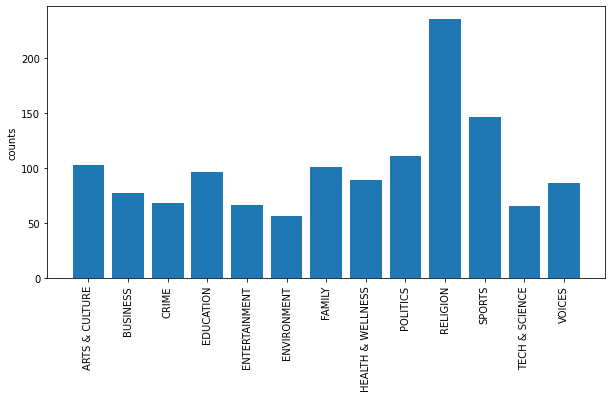

In [7]:
# Plot the distribution of the categories
fig = plt.figure(figsize=(10,5))
lbl, counts = np.unique(labels, return_counts=True)
ticks = range(len(counts))
plt.bar(ticks, counts, align='center')
plt.xticks(ticks, lbl)
plt.xticks(rotation=90)
plt.ylabel('counts')
plt.show()

In [ ]:
#@title Preprocess the articles for training the model
#@markdown We will encode the labels and tokenize the articles for use with the model.  
#@markdown Huggingface provides pretrained tokenizers that were used when training the models. We will use AutoTokenizer from pretrained "roberta-base" model.

In [8]:
# Create a function to encode categorical labels to numeric format
def encode_labels(labels):
    indices=[]
    for j in range(len(labels)):
        for i in range(n_categories):
            if labels[j]==categories[i]:
                indices.append(i)
    return indices

# Encode labels
indices = encode_labels(labels)
indices[:10]

[4, 11, 10, 6, 12, 3, 9, 7, 4, 4]

In [9]:
# Import Roberta tokenizer 
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Tokenize the articles
tokenized_articles = tokenizer(articles, padding=True, truncation=True, return_tensors='tf')

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [10]:
# detect and initialize the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

batch_size=32
print('Batch size:', batch_size)
AUTOTUNE = tf.data.experimental.AUTOTUNE

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.125.47.186:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.125.47.186:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Batch size: 32


In [12]:
# Create a tensorflow dataset
dataset = tf.data.Dataset.from_tensor_slices((dict(tokenized_articles), indices)) 

# Train test split, we will use 10% of the data for validation
val_data_size = int(0.1*n_elements)
val_ds = dataset.take(val_data_size).batch(batch_size, drop_remainder=True) 
train_ds = dataset.skip(val_data_size).batch(batch_size, drop_remainder=True)
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

In [13]:
# Visualize tokenization results for headlines
sample_tokens = tokenizer(headlines[0:3], padding=True, truncation=True)['input_ids']
for i in range(3):
  print('Input:',headlines[i])
  print('Subword tokenization:',tokenizer.tokenize(headlines[i]))
  print('Indices:', sample_tokens[i])

Input: 'Wheel Of Fortune' Contestant Can't Solve The Puzzle — Even With Every Single Letter
Subword tokenization: ["'", 'Wheel', 'ĠOf', 'ĠFortune', "'", 'ĠContest', 'ant', 'ĠCan', "'t", 'ĠSol', 've', 'ĠThe', 'ĠPuzzle', 'ĠâĢĶ', 'ĠEven', 'ĠWith', 'ĠEvery', 'ĠSingle', 'ĠLetter']
Indices: [0, 108, 43560, 1525, 15938, 108, 17657, 927, 2615, 75, 4856, 548, 20, 45995, 93, 1648, 590, 4337, 15773, 17103, 2]
Input: I'm a Scientist With Learning Disabilities and That's Okay!
Subword tokenization: ['I', "'m", 'Ġa', 'ĠScientist', 'ĠWith', 'ĠLearning', 'ĠDis', 'abilities', 'Ġand', 'ĠThat', "'s", 'ĠOkay', '!']
Indices: [0, 100, 437, 10, 37774, 590, 13807, 6310, 25264, 8, 280, 18, 8487, 328, 2, 1, 1, 1, 1, 1, 1]
Input: USA Makes History With First Olympic Curling Gold After Unlikely Comeback
Subword tokenization: ['USA', 'ĠMakes', 'ĠHistory', 'ĠWith', 'ĠFirst', 'ĠOlympic', 'ĠCur', 'ling', 'ĠGold', 'ĠAfter', 'ĠUnlike', 'ly', 'ĠCome', 'back']
Indices: [0, 9080, 25379, 7298, 590, 1234, 3336, 6781, 1527, 

In [14]:
# Compile the model
with tpu_strategy.scope():
  model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=n_categories)
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, clipnorm=1.),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=[tf.metrics.SparseCategoricalAccuracy(),tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3, name='Sparse_Top_3_Categorical_Accuracy')]
  )

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
# Train the model on our dataset
history = model.fit(x=train_ds, validation_data=val_ds, epochs=10, verbose=2)

Epoch 1/10
36/36 - 120s - loss: 2.5006 - sparse_categorical_accuracy: 0.1675 - Sparse_Top_3_Categorical_Accuracy: 0.3741 - val_loss: 2.3958 - val_sparse_categorical_accuracy: 0.1562 - val_Sparse_Top_3_Categorical_Accuracy: 0.5156 - 120s/epoch - 3s/step
Epoch 2/10
36/36 - 6s - loss: 2.0876 - sparse_categorical_accuracy: 0.3776 - Sparse_Top_3_Categorical_Accuracy: 0.6615 - val_loss: 1.7234 - val_sparse_categorical_accuracy: 0.5859 - val_Sparse_Top_3_Categorical_Accuracy: 0.8125 - 6s/epoch - 175ms/step
Epoch 3/10
36/36 - 6s - loss: 1.4375 - sparse_categorical_accuracy: 0.7005 - Sparse_Top_3_Categorical_Accuracy: 0.8872 - val_loss: 1.2916 - val_sparse_categorical_accuracy: 0.6719 - val_Sparse_Top_3_Categorical_Accuracy: 0.8516 - 6s/epoch - 177ms/step
Epoch 4/10
36/36 - 7s - loss: 1.0271 - sparse_categorical_accuracy: 0.7691 - Sparse_Top_3_Categorical_Accuracy: 0.9375 - val_loss: 1.0812 - val_sparse_categorical_accuracy: 0.7031 - val_Sparse_Top_3_Categorical_Accuracy: 0.9219 - 7s/epoch - 18

In [16]:
# Save the weights and pickle the model for importing to flask
model.save_weights('./saved_weights.h5')
pickle.dump(model, open('categories_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://9f471df6-54d1-4e12-a043-7ef8872ad7ec/assets


INFO:tensorflow:Assets written to: ram://9f471df6-54d1-4e12-a043-7ef8872ad7ec/assets


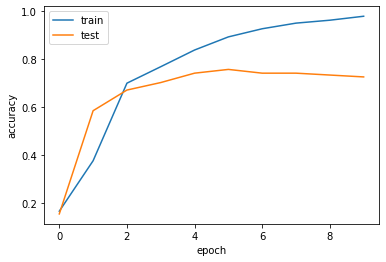

In [17]:
# Plot the accuracy for training and validation datasets
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('train_history.png')
plt.show()

In [18]:
# Create lists of article and labels for validation dataset
val_articles = []
val_labels = []

for i in range(val_data_size):
    val_labels.append(labels[i])
    val_articles.append(articles[i])
    
print(f'Category: {val_labels[0]}')
print(f'Article: {val_articles[0]}') 

Category: ENTERTAINMENT
Article: That was wheel unfortunate.
A contestant on “Wheel of Fortune” Monday had every letter of the puzzle revealed ― and still got the answer wrong.
With $7,100 at stake, all Jonny had to do was read “Flamenco dance lessons.” Only he pronounced “Flamenco” as “flamingo” and got buzzed for being incorrect. Another contestant then solved it.
We don’t have the heart to call him a bird brain.
“You gave us a ‘G’ instead of a ‘C,’” host Pat Sajak told Jonny. The game-show crew then checked the replay and the decision stayed.
Julian Batts knows your pain, Jonny. In 2014 he mispronounced Achilles on a completely revealed board and lost a chance at a million bucks.
H/T Today



In [19]:
# Encode labels for validation dataset
val_labels = encode_labels(val_labels)

# Tokenize articles for validation dataset
val_tokens = tokenizer(val_articles, padding=True, truncation=True, return_tensors='tf')

# Make predictions
logits = model.predict(dict(val_tokens), verbose=2).logits
prob = tf.nn.softmax(logits, axis=1).numpy()
predictions = np.argmax(prob, axis=1)
confusion_matrix = tf.math.confusion_matrix(val_labels, predictions, num_classes=n_categories)

5/5 - 19s - 19s/epoch - 4s/step


[Text(159.0, 0.5, 'actual'), Text(0.5, 69.0, 'predicted')]

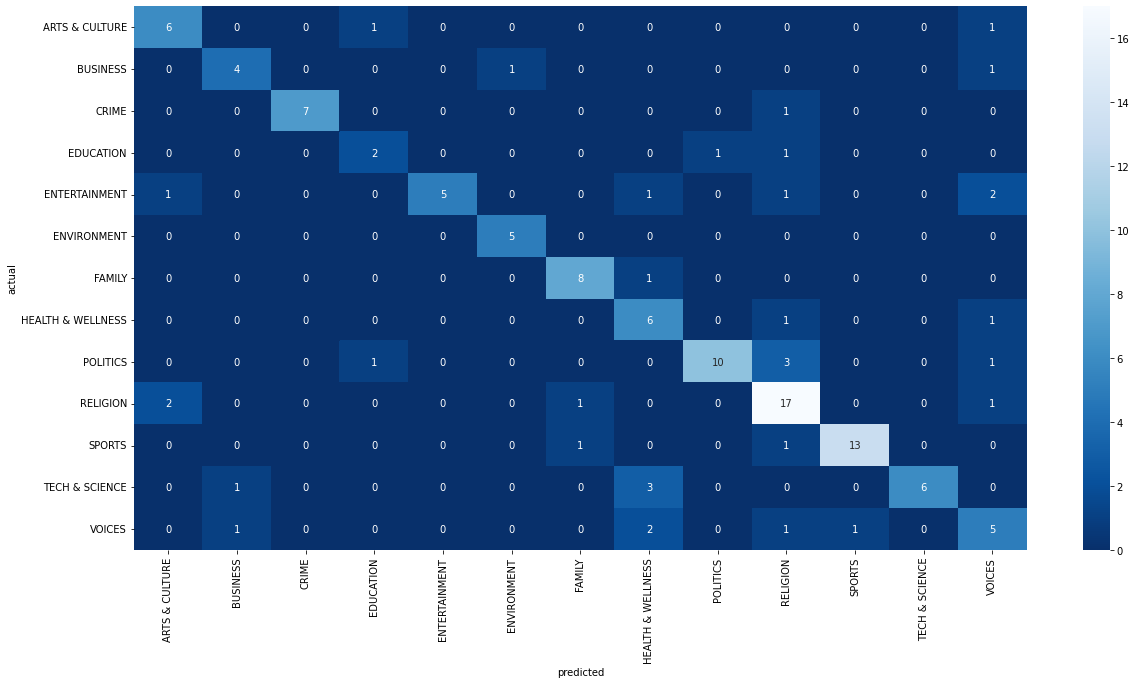

In [20]:
# Visualize confusion matrix
import seaborn as sns
plt.figure(figsize=(20,10))
ax = sns.heatmap(confusion_matrix, 
            annot=True, 
            cmap='Blues_r', 
            xticklabels=categories, 
            yticklabels=categories
            ) 
ax.set(xlabel='predicted', ylabel='actual')

In [21]:
# Determine precision, accuracy and f1 scores
precision = metrics.precision_score(val_labels, predictions, average='weighted')
recall = metrics.recall_score(val_labels, predictions, average='weighted')
f1 = metrics.f1_score(val_labels, predictions, average='weighted')

print(f'Precision: {precision}, \nRecall: {recall}, \nF1 score: {f1}.\n')

Precision: 0.7740672763928579, 
Recall: 0.7286821705426356, 
F1 score: 0.7341077825570085.



In [22]:
#@title Predict the classification for a new article supplied by the user

In [23]:
# Load trained model and weights
trained_model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=n_categories)
trained_model.load_weights('./saved_weights.h5')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
# Test on user supplied article - this will be supplied by user on the website
user_article = "London (CNN)A Member of Parliament in British Prime Minister Boris Johnson's Conservative Party, Neil Parish, said Saturday he will resign after admitting twice watching pornography in the House of Commons.Parish told the BBC the first time he viewed the explicit material was an accident after searching online for farm vehicles. The second time was deliberate and a the 65-year-old said. Johnsons government is currently engulfed in numerous scandals, just days ahead of crucial local elections. The Prime Minister himself has been fined by police for breaching his own Covid rules during the 2020 lockdown, and faces an investigation into whether he misled Parliament about parties in Downing Street. And last week, his party was accused of having a serious misogyny problem, after one of his backbenchers anonymously claimed to a newspaper that Angela Rayner, deputy leader of the opposition Labour Party, distracted Johnson in the House of Commons by crossing and uncrossing her legs, similar to Sharon Stones character in the movie Basic Instinct."

In [25]:
# Tokenize user-supplied article
user_tokens = tokenizer(user_article, padding=True, truncation=True, return_tensors='tf')

# Make predictions for the user-supplied article
user_logits = trained_model.predict(dict(user_tokens), verbose=2).logits
user_prob = tf.nn.softmax(user_logits, axis=1).numpy()
user_predictions = np.argmax(user_prob, axis=1)

1/1 - 3s - 3s/epoch - 3s/step


In [26]:
# Define a function to list top 3 predicted categories
def top_predictions(array, k): 
    top_indices = np.argsort(array)[-k:]
    top_probabilities = []
    for i in range(k):
        top_probabilities.append(np.around(array[top_indices[i]]*100, decimals=1))
    return np.flip(top_indices), np.flip(top_probabilities)      

In [27]:
# Print top 3 predictions for user-supplied article
top_categories, top_probabilities = top_predictions(user_prob[0], 3)
print(f'Prediction 1: {categories[top_categories[0]]} ({top_probabilities[0]}%); Prediction 2: {categories[top_categories[1]]} ({top_probabilities[1]}%); Prediction 3: {categories[top_categories[2]]} ({top_probabilities[1]}%)')        
    

Prediction 1: POLITICS (75.9%); Prediction 2: ENVIRONMENT (11.6%); Prediction 3: ENTERTAINMENT (11.6%)


In [30]:
# Print the final(best) prediction category
print(f'This article is most probably about {categories[user_predictions[0]]}')

This article is most probably about POLITICS
